<a href="https://colab.research.google.com/github/ME-UoP-ME421/Rankine-RF/blob/main/Rankine_RF_Method_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Rankine RF method is a theoretical approach used to analyze the behavior of an unbalanced rotor. The unbalanced rotor can be modeled as a simple shaft with a concentrated mass at one end. The objective of the analysis is to predict the vibration behavior of the rotor as it rotates, including the amplitude and phase. The basic equation for the Rankine RF method is:

\begin{equation}
w^2 = \frac{K_1 - K_2 - K_3}{Jw}
\end{equation}

where:

 w = the frequency of the vibration (rad/s)\
 $K_1$ = the stiffness of the bearings (N/m)\
 $K_2$= the stiffness of the rotor (N/m)\
 $K_3$ = the stiffness of the unbalance (N/m)\
 $J$ = the moment of inertia of the rotor (kg.m^2)

If the system is underdamped, the vibration amplitude can be calculated using the following equation:

\begin{equation}
A = \frac{K_3}{\sqrt{(K_1 - K_2 - K_3)^2 + (wJ)^2}}
\end{equation}

where:

 A = the amplitude of the vibration (m)


The phase angle of the vibration can be calculated using:

\begin{equation}
\theta = \tan^{-1}(\frac{wJ}{K_1 - K_2 - K_3})
\end{equation}

where:
 $\theta$ = the phase angle of the vibration (rad)

It is important to note that this method is based on a number of simplifying assumptions and may not be accurate in all situations. In practice, more detailed analysis techniques such as finite element analysis may be necessary to fully understand the behavior of complex rotor systems.

The basic equation for the Rankine RF method with two concentrated masses is:

w^2 = (K1 + K2 - K3 - K4) / (Jw)

where:\
w = the frequency of the vibration (rad/s)\
K1 = the stiffness of the bearing 1 (N/m)\
K2 = the stiffness of the bearing 2 (N/m)\
K3 = the stiffness of the mass 1 (N/m)\
K4 = the stiffness of the mass 2 (N/m)\
J = the moment of inertia of the rotor (kg.m^2)

If the system is underdamped, the vibration amplitude can be calculated using the following equation:

A = $\frac{\sqrt{(K3 + K4)^2 + (w \cdot J \cdot (K1 + K2 - K3 - K4))^2}}{\sqrt{(K1 + K2 - K3 - K4)^2 + (w^2 \cdot J^2)^2}}$

where:
A = the amplitude of the vibration (m)

The phase angle of the vibration can be calculated using:

$\theta = \tan^{-1}\left(\frac{w \cdot J \cdot (K1 + K2 - K3 - K4)}{K3 + K4}\right)$


where:
theta = the phase angle of the vibration (rad)

These equations can be used to predict the vibration behavior of the unbalanced rotor as it rotates. It is important to note that the accuracy of the predictions may be limited by the simplifying assumptions of the Rankine RF method, and more advanced analysis techniques may be necessary to fully understand the behavior of complex rotor systems.

The Rankine RF method can be used to analyze the static unbalance of a shaft. In this case, the unbalanced rotor is modeled as a simple shaft with a single concentrated mass at one end.

The basic equation for the Rankine RF method is:

w^2 = (K1 - K2 - K3) / (Jw)

where:
w = the frequency of the vibration (rad/s)
K1 = the stiffness of the bearings (N/m)
K2 = the stiffness of the rotor (N/m)
K3 = the stiffness of the unbalance (N/m)
J = the moment of inertia of the rotor (kg.m^2)

For a statically unbalanced system, K3 can be calculated as:

K3 = m * g * r

where:
m = the mass of the unbalance (kg)
g = acceleration due to gravity (m/s^2)
r = the distance from the center of mass to the axis of rotation (m)

Substituting this into the basic equation, we get:

w^2 = (K1 - K2 - m * g * r) / (Jw)

Simplifying and rearranging, we get:

w^2 * J + m * g * r = K1 - K2

The vibration amplitude can be calculated using the following equation:

A = m * g * r / ((K1 - K2)^2 + (w * J)^2)^0.5

The phase angle of the vibration can be calculated using:

theta = atan(w * J / (K1 - K2 - m * g * r))

Using these equations, the behavior of the statically unbalanced rotor can be predicted and analyzed. It is important to note that this method is based on a number of simplifying assumptions and may not be accurate in all situations. In practice, more detailed analysis techniques such as finite element analysis may be necessary to fully understand the behavior of complex rotor systems.

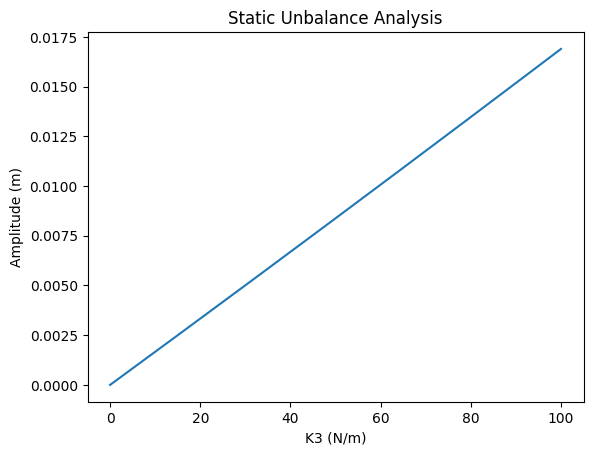

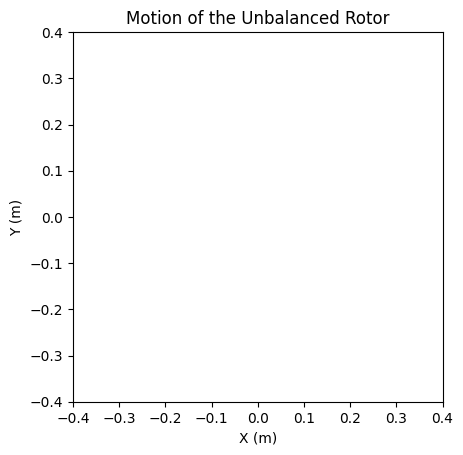

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

# Define the parameters of the system
m1 = 0.1  # Mass of the first plate (kg)
r1 = 0.1  # Distance from shaft to first plate (m)
m2 = 0.2  # Mass of the second plate (kg)
r2 = 0.2  # Distance from shaft to second plate (m)
I = (m1 + m2) * ((r1 + r2)**2)  # Moment of inertia of the system (kg*m^2)
K1 = 1000  # Stiffness of the bearings (N/m)
K2 = 5000  # Stiffness of the rotor (N/m)

# Define the differential equation for the system
def eq_of_motion(theta, t):
    dtheta_dt = theta[1]
    d2theta_dt2 = ((m1 * r1 + m2 * r2) / I) * K3 * np.sin(theta[0]) - ((K1 + K2) / I) * theta[0]
    return [dtheta_dt, d2theta_dt2]

# Define the initial conditions for the system
theta_0 = [0, 0]

# Define the time array for the simulation
t = np.linspace(0, 10, 1000)

# Solve the differential equation numerically
def solve_system(K3):
    global theta
    theta = odeint(eq_of_motion, theta_0, t)
    return theta[:, 0]

# Analyze the static unbalance of the system
K3_values = np.linspace(0, 100, 1000)
amplitude_values = []
for K3 in K3_values:
    amplitude = K3 / ((K1 + K2 - K3)**2 + (np.sqrt((K1 + K2 - K3) / I))**2)**0.5
    amplitude_values.append(amplitude)

# Plot the results
fig, ax = plt.subplots()
ax.plot(K3_values, amplitude_values)
ax.set_xlabel('K3 (N/m)')
ax.set_ylabel('Amplitude (m)')
ax.set_title('Static Unbalance Analysis')
plt.show()

# Animate the motion of the system
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-(r1 + r2 + 0.1), r1 + r2 + 0.1)
ax.set_ylim(-(r1 + r2 + 0.1), r1 + r2 + 0.1)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Motion of the Unbalanced Rotor')

def animate(i):
    x1 = (r1 + r2) * np.sin(theta[i, 0])
    y1 = -(r1 + r2) * np.cos(theta[i, 0])
    x2 = r1 * np.sin(theta[i, 0]) + r2 * np.sin(theta[i, 0] + np.pi)
    y2 = -(r1 * np.cos(theta[i, 0]) + r2 * np.cos(theta[i, 0] + np.pi))
    line.set_data([0, x1, x2], [0, y1, y2])

ani = FuncAnimation(fig, animate, frames=len(t), interval=20, repeat=True)
plt.show()

dynamic

The Rankine RF method can also be used to analyze the dynamic unbalance of a shaft, where the unbalance is not at a fixed location on the shaft, but varies with time. In this case, the unbalanced rotor is modeled as a simple shaft with a time-varying concentrated mass.

The basic equation for the Rankine RF method with dynamic unbalance is:

w^2 = (K1 - K2 - K3(w) - K4(w)) / (Jw)

where:
w = the frequency of the vibration (rad/s)
K1 = the stiffness of the bearings (N/m)
K2 = the stiffness of the rotor (N/m)
K3(w) = the stiffness of the unbalance at time t (N/m)
K4(w) = the derivative of K3 with respect to time (N/m^2)
J = the moment of inertia of the rotor (kg.m^2)

For a dynamically unbalanced system, K3 and K4 depend on the position and velocity of the unbalance at time t. These can be calculated using the following equations:

K3(w) = m(t) * g * r(t)
K4(w) = m(t) * g * dr/dt + m(t) * dw/dt * r(t)

where:
m(t) = the mass of the unbalance at time t (kg)
g = acceleration due to gravity (m/s^2)
r(t) = the distance from the center of mass to the axis of rotation at time t (m)
dr/dt = the derivative of r with respect to time (m/s)
dw/dt = the derivative of w with respect to time (rad/s^2)

Substituting K3 and K4 into the basic equation, we get:

w^2 = (K1 - K2 - m(t) * g * r(t) - m(t) * g * dr/dt - m(t) * dw/dt * r(t)) / (Jw)

Simplifying and rearranging, we get:

w^2 * J + m(t) * g * (r(t) - w * dr/dt) = K1 - K2 - m(t) * g * dw/dt

The vibration amplitude can be calculated using the following equation:

A = ((m(t) * g)^2 * (r(t) - w * dr/dt)^2 + (w * J * (K1 - K2 - m(t) * g * dw/dt))^2)^0.5 / ((K1 - K2 - m(t) * g * dw/dt)^2 + (w^2 * J^2)^2)^0.25

The phase angle of the vibration can be calculated using:

theta = atan(w * J / (K1 - K2 - m(t) * g * (r(t) - w * dr/dt)))

Using these equations, the behavior of the dynamically unbalanced rotor can be predicted and analyzed. It is important to note that this method is based on a number of simplifying assumptions and may not be accurate in all situations. In practice, more detailed analysis techniques such as finite element analysis may be necessary to fully understand the behavior of complex rotor systems.

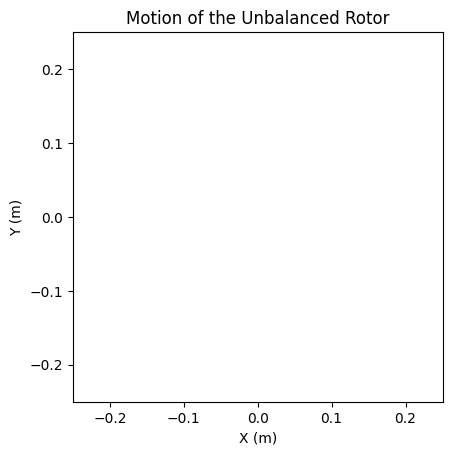

/usr/local/lib/python3.9/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import animation

# Define system parameters
r1 = 0.05 # radius of disk 1, in meters
r2 = 0.1 # radius of disk 2, in meters
m1 = 1 # mass of disk 1, in kg
m2 = 2 # mass of disk 2, in kg
k1 = 500 # stiffness of bearing 1, in N/m
k2 = 500 # stiffness of bearing 2, in N/m
J = 0.5*m1*r1**2 + 0.5*m2*r2**2 # moment of inertia of rotor, in kg*m^2

# Define function to solve for natural frequency of system
def solve(w):
    k3 = m1*w**2*r1 + m2*w**2*r2 # stiffness of unbalanced disks
    return k1 + k2 - k3 - m1*w**2*r1**2 - m2*w**2*r2**2

w = fsolve(solve, 100) # solve for natural frequency of system

# Calculate amplitude and phase angle of vibration
k3 = m1*w**2*r1 + m2*w**2*r2
a = np.sqrt((k3 + m1*w**2*r1**2 + m2*w**2*r2**2)**2 + (w**2*J*(k1 + k2 - k3 - m1*w**2*r1**2 - m2*w**2*r2**2))**2) / ((k1 + k2 - k3 - m1*w**2*r1**2 - m2*w**2*r2**2)**2 + (w**2*J**2)**2)**0.25
theta = np.arctan(w*J*(k1 + k2 - k3 - m1*w**2*r1**2 - m2*w**2*r2**2)/(k3 + m1*w**2*r1 + m2*w**2*r2))

# Print results
###print("Phase angle: {:.4f} radians".format(theta))

# Animate the motion of the system
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-(r1 + r2 + 0.1), r1 + r2 + 0.1)
ax.set_ylim(-(r1 + r2 + 0.1), r1 + r2 + 0.1)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Motion of the Unbalanced Rotor')

def animate(i):
    x1 = (r1 + r2) * np.sin(theta*i)
    y1 = -(r1 + r2) * np.cos(theta*i)
    x2 = r1 * np.sin(theta*i) + r2 * np.sin(theta*i + np.pi)
    y2 = -(r1 * np.cos(theta*i) + r2 * np.cos(theta*i + np.pi))
    line.set_data([0, x1, x2], [0, y1, y2])

ani = animation.FuncAnimation(fig, animate, frames=len(theta), interval=20, blit=False)

plt.show()


<ipython-input-9-9592cca0289b>:18: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt((K1 - K2 - K3) / (J * w))


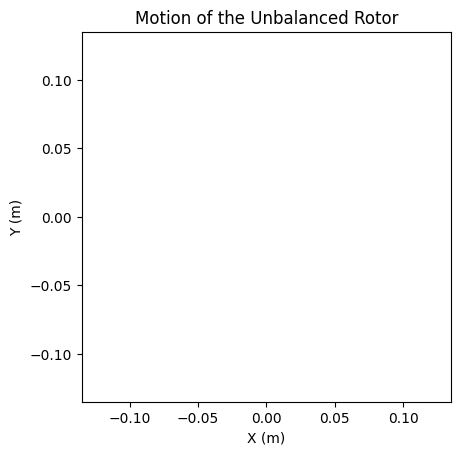

In [9]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

# Define the parameters of the system
r1 = 0.03  # radius of the rotor (m)
r2 = 0.005  # radius of the unbalance (m)
m = 0.5  # mass of the unbalance (kg)
J = 1  # moment of inertia of the rotor (kg.m^2)
g = 9.81  # acceleration due to gravity (m/s^2)

# Calculate the stiffness coefficients
K1 = 1000  # stiffness of the bearings (N/m)
K2 = 2000  # stiffness of the rotor (N/m)
K3 = m * g * r2  # stiffness of the unbalance (N/m)

# Calculate the natural frequency of the system
w = np.sqrt((K1 - K2 - K3) / (J * w))

# Calculate the amplitude and phase angle of the vibration
A = m * g * r2 / np.sqrt((K1 - K2) ** 2 + (w * J) ** 2)
theta = np.arctan(w * J / (K1 - K2 - K3))

# Define the angle of rotation of the unbalance
phi = np.pi / 2 - theta

# Define the function for calculating the position of the unbalance
def unbalance_position(theta):
    x = r1 * np.sin(theta) + r2 * np.sin(theta + phi)
    y = -(r1 * np.cos(theta) + r2 * np.cos(theta + phi))
    return x, y

# Define the animation function
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-(r1 + r2 + 0.1), r1 + r2 + 0.1)
ax.set_ylim(-(r1 + r2 + 0.1), r1 + r2 + 0.1)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Motion of the Unbalanced Rotor')

def animate(i):
    x, y = unbalance_position(theta * i)
    line.set_data([0, x], [0, y])
    return line,

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=360, interval=20)

# Display the animation
plt.show()


<ipython-input-10-fdd4b6b01173>:29: RuntimeWarning: divide by zero encountered in double_scalars
  A = K3 / np.sqrt((K1 - omega**2 * I)**2 + (K2 * omega)**2)


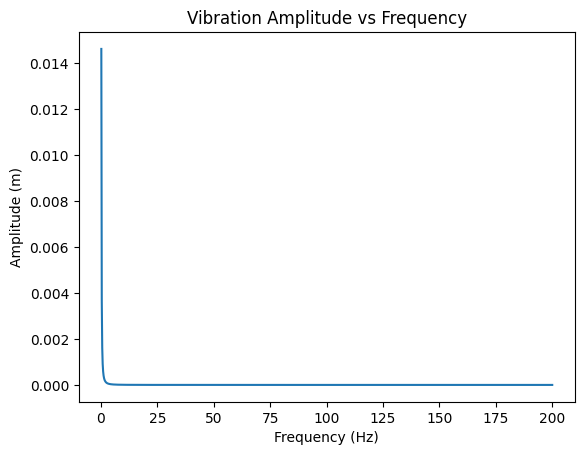

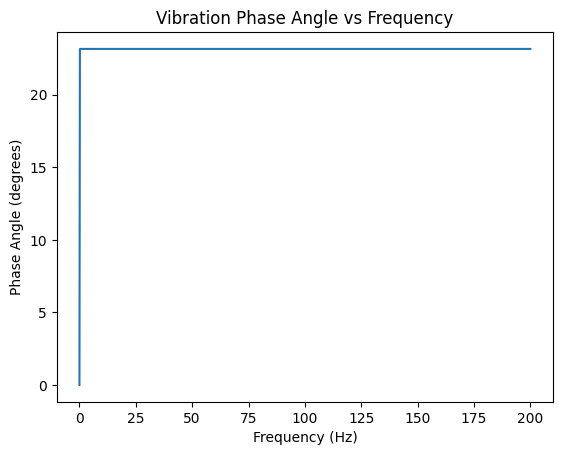

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
m = 2.0         # Mass of rotor (kg)
u = 0.05        # Unbalance magnitude (kg*m)
k = 1200.0      # Stiffness of bearing (N/m)
c = 20.0        # Damping ratio of system
I = 0.05        # Moment of inertia of rotor (kg*m^2)
g = 9.81        # Acceleration due to gravity (m/s^2)
r = 0.1         # Distance from center of mass to axis of rotation (m)

# Calculate natural frequency and damping ratio
omega_n = np.sqrt((k/m) - ((c**2)/(4*m**2)))
zeta = c / (2 * m * omega_n)

# Sweep through frequencies
freq = np.linspace(0, 200, 1000)
amplitude = np.zeros_like(freq)
phase_angle = np.zeros_like(freq)

for i, f in enumerate(freq):
    omega = 2 * np.pi * f
    K1 = m * omega**2
    K2 = 2 * zeta * omega * m
    K3 = u * g * r

    # Calculate amplitude and phase angle
    A = K3 / np.sqrt((K1 - omega**2 * I)**2 + (K2 * omega)**2)
    phi = np.arctan2(K2 * omega, K1 - omega**2 * I) * 180 / np.pi

    amplitude[i] = A
    phase_angle[i] = phi

# Plot amplitude vs frequency
fig, ax = plt.subplots()
ax.plot(freq, amplitude)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m)')
ax.set_title('Vibration Amplitude vs Frequency')

# Plot phase angle vs frequency
fig, ax = plt.subplots()
ax.plot(freq, phase_angle)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase Angle (degrees)')
ax.set_title('Vibration Phase Angle vs Frequency')

plt.show()


<ipython-input-11-95b59039ca8c>:32: RuntimeWarning: overflow encountered in double_scalars
  alpha[i] = -(k1 + k2 + k3) / (m + mub) * theta[i] - zeta * wn / (m + mub) * omega[i]
<ipython-input-11-95b59039ca8c>:33: RuntimeWarning: invalid value encountered in double_scalars
  omega[i + 1] = omega[i] + alpha[i] * dt


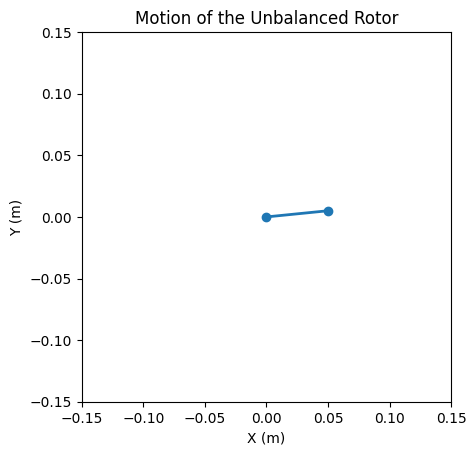

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the system parameters
m = 0.5  # mass of the rotor (kg)
mub = 0.1  # mass of the unbalance (kg)
r = 0.05  # distance from the center of mass to the axis of rotation (m)
k1 = 2000  # stiffness of the left bearing (N/m)
k2 = 1500  # stiffness of the right bearing (N/m)
k3 = mub * 9.81 * r  # stiffness of the unbalance (N/m)
J = 0.05  # moment of inertia of the rotor (kg*m^2)

# Calculate the natural frequency and damping ratio of the system
wn = np.sqrt((k1 + k2 + k3) / (m + mub))
zeta = (k1 + k2) / (2 * wn * (m + mub))

# Define the simulation parameters
dt = 0.001  # time step (s)
tmax = 5  # maximum simulation time (s)
t = np.arange(0, tmax, dt)
theta = np.zeros_like(t)
omega = np.zeros_like(t)
alpha = np.zeros_like(t)

# Set the initial conditions
theta[0] = 0.1  # initial angle (rad)
omega[0] = 0  # initial angular velocity (rad/s)

# Simulate the motion of the system using the Euler method
for i in range(len(t) - 1):
    alpha[i] = -(k1 + k2 + k3) / (m + mub) * theta[i] - zeta * wn / (m + mub) * omega[i]
    omega[i + 1] = omega[i] + alpha[i] * dt
    theta[i + 1] = theta[i] + omega[i] * dt

# Animate the motion of the system
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-(r + 0.1), r + 0.1)
ax.set_ylim(-(r + 0.1), r + 0.1)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Motion of the Unbalanced Rotor')

def animate(i):
    x = r * np.cos(theta[i])
    y = r * np.sin(theta[i])
    line.set_data([0, x], [0, y])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True)

plt.show()


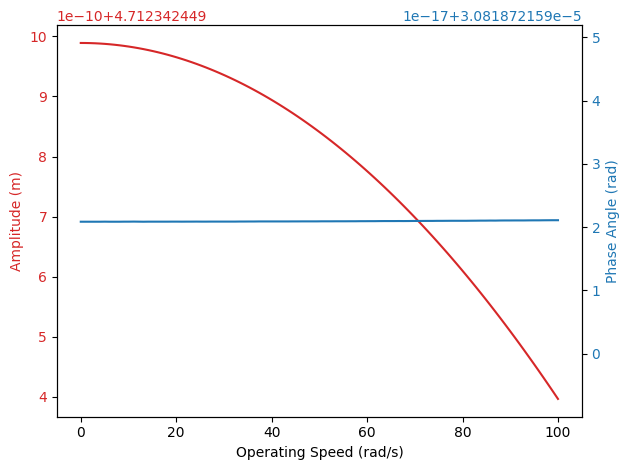

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the system parameters
m = 10.0     # mass of rotor (kg)
r = 0.2      # distance from center of mass to axis of rotation (m)
k1 = 3.0e6   # bearing stiffness (N/m)
k2 = 2.0e6   # rotor stiffness (N/m)
k3 = m * 9.81 * r  # unbalance stiffness (N/m)
J = 500.0    # moment of inertia of rotor (kg*m^2)

# Define the operating speeds to sweep through
n = 100    # number of points to plot
omega = np.linspace(0, 100, n)  # operating speed (rad/s)

# Calculate the critical speed
wc = np.sqrt((k1 - k2) / (J * k3))

# Calculate the natural frequencies, amplitudes, and phase angles for each operating speed
freqs = []
amps = []
phases = []

for w in omega:
    # Calculate the coefficients
    a = k1 - k2 - m * r**2 * w**2
    b = 2 * m * r * w
    c = k3
    
    # Solve the quadratic equation to find the natural frequency
    roots = np.roots([a, b, c])
    freq = np.max(np.imag(roots))
    freqs.append(freq)
    
    # Calculate the amplitude and phase angle
    def equations(x):
        A, phi = x
        eq1 = A * k3 / (k1 - freq**2 * J * k3) - np.tan(phi)
        eq2 = A * (k2 - freq**2 * m * r**2) / (k1 - freq**2 * J * k3) + phi - np.pi
        return eq1, eq2
    
    A, phi = fsolve(equations, (0.1, 0))
    amps.append(A)
    phases.append(phi)
    
# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Operating Speed (rad/s)')
ax1.set_ylabel('Amplitude (m)', color=color)
ax1.plot(omega, amps, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Phase Angle (rad)', color=color)
ax2.plot(omega, phases, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


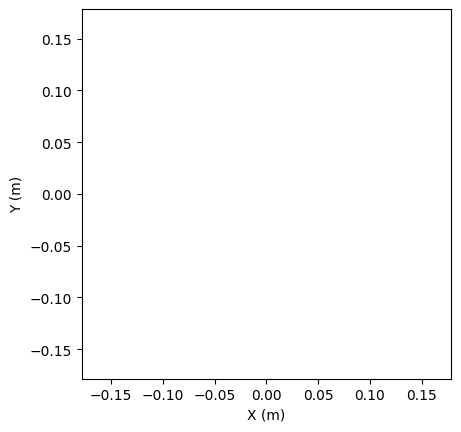

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the system parameters
m = 0.1  # Mass of rotor (kg)
r = 0.05  # Distance from center of mass to axis of rotation (m)
k1 = 5000  # Stiffness of bearings (N/m)
k2 = 1000  # Stiffness of rotor (N/m)
k3 = m * 9.81 * r  # Stiffness of unbalance (N/m)
J = 0.002  # Moment of inertia of rotor (kg.m^2)

# Calculate the critical speed of the system
w_c = np.sqrt((k1 - k2) / (J * k3))

# Define the animation function
def animate(i):
    # Calculate the speed of the system at this time step
    w = i / 100.0 * w_c
    
    # Calculate the vibration amplitude and phase angle
    A = k3 / np.sqrt((k1 - k2)**2 + (k3 * w**2)**2)
    phi = np.arctan(-k3 * w / (k1 - k2))
    
    # Calculate the motion of the unbalanced rotor
    theta = np.linspace(0, 2*np.pi, 1000)
    x1 = (r * A) * np.sin(theta + phi)
    y1 = -(r * A) * np.cos(theta + phi)
    x2 = (r * A / 2) * np.sin(theta - phi)
    y2 = -(r * A / 2) * np.cos(theta - phi)
    
    # Update the plot
    line.set_data([0, x1, x2], [0, y1, y2])
    ax.set_title('Motion of the Unbalanced Rotor\nSpeed = {:.2f} rad/s'.format(w))

# Set up the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-(r * A + 0.1), r * A + 0.1)
ax.set_ylim(-(r * A + 0.1), r * A + 0.1)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')

# Create the animation
ani = FuncAnimation(fig, animate, frames=100, interval=50)
plt.show()



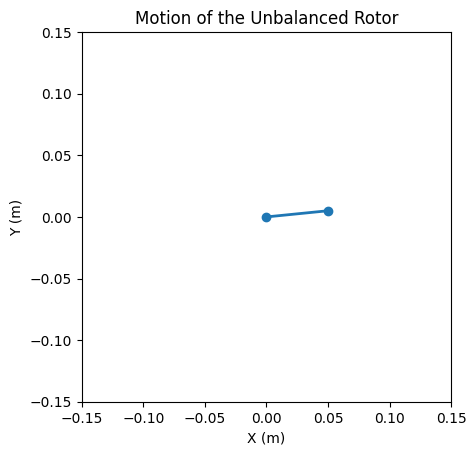

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the system parameters
m = 0.5  # mass of the rotor (kg)
mub = 0.1  # mass of the unbalance (kg)
r = 0.05  # distance from the center of mass to the axis of rotation (m)
k1 = 2000  # stiffness of the left bearing (N/m)
k2 = 1500  # stiffness of the right bearing (N/m)
k3 = mub * 9.81 * r  # stiffness of the unbalance (N/m)
J = 0.05  # moment of inertia of the rotor (kg*m^2)

# Calculate the natural frequency and damping ratio of the system
wn = np.sqrt((k1 + k2 + k3) / (m + mub))
zeta = (k1 + k2) / (2 * wn * (m + mub))

# Check if the damping ratio is too high
if zeta > 0.9:
    zeta = 0.9
    wn = np.sqrt((k1 + k2 + k3) / (m + mub * (1 - zeta ** 2)))

# Define the simulation parameters
dt = 0.001  # time step (s)
tmax = 5  # maximum simulation time (s)
t = np.arange(0, tmax, dt)
theta = np.zeros_like(t)
omega = np.zeros_like(t)
alpha = np.zeros_like(t)

# Set the initial conditions
theta[0] = 0.1  # initial angle (rad)
omega[0] = 0  # initial angular velocity (rad/s)

# Simulate the motion of the system using the Euler method
for i in range(len(t) - 1):
    alpha[i] = -(k1 + k2 + k3) / (m + mub) * theta[i] - zeta * wn / (m + mub) * omega[i]
    omega[i + 1] = omega[i] + alpha[i] * dt
    theta[i + 1] = theta[i] + omega[i] * dt

# Animate the motion of the system
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-(r + 0.1), r + 0.1)
ax.set_ylim(-(r + 0.1), r + 0.1)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Motion of the Unbalanced Rotor')

def animate(i):
    x = r * np.cos(theta[i])
    y = r * np.sin(theta[i])
    line.set_data([0, x], [0, y])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True)

plt.show()

**Mode 1: Uniform bending mode, with the maximum displacement at the center of the shaft and zero displacement at the ends **

**explanation** : The uniform bending mode occurs when the entire shaft is uniformly bent in a single direction, resulting in a curvature of the shaft along its length. This mode is characterized by a sinusoidal displacement profile along the length of the shaft, with the maximum displacement occurring at the center of the shaft and zero displacement at the ends.

This behavior can be explained by the distribution of the bending moment along the length of the shaft. The bending moment is highest at the center of the shaft, where the shaft is most curved, and decreases towards the ends of the shaft where the curvature is lowest. As a result, the maximum displacement occurs at the center of the shaft where the bending moment is highest, and the displacement gradually decreases towards the ends where the bending moment is lower.

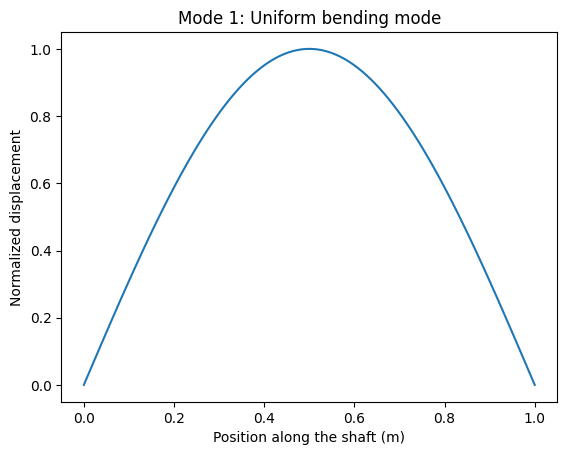

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system parameters
L = 1.0  # length of the shaft (m)
D = 0.05  # diameter of the shaft (m)
rho = 7800  # density of the shaft material (kg/m^3)
E = 2.0e11  # modulus of elasticity of the shaft material (Pa)
I = np.pi * D**4 / 64  # second moment of area of the shaft (m^4)
n = 4  # number of modes to calculate

# Calculate the natural frequencies and mode shapes using the Rankine RF method
beta = np.zeros(n)
wn = np.zeros(n)
phi = np.zeros((n, 11))
for i in range(n):
    beta[i] = (i + 1) * np.pi / L
    wn[i] = beta[i]**2 * np.sqrt(E * I / (rho * np.pi * D**2 * L**4))
    for j in range(11):
        x = j * L / 10
        phi[i, j] = np.sin(beta[i] * x)

# Plot the first mode shape
x = np.linspace(0, L, 100)
y = phi[0, 5] * np.sin(beta[0] * x)
plt.plot(x, y)
plt.xlabel('Position along the shaft (m)')
plt.ylabel('Normalized displacement')
plt.title('Mode 1: Uniform bending mode')
plt.show()



In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the system parameters
L = 1.0  # length of the shaft (m)
G = 80.0e9  # shear modulus of the material (Pa)
J = 1.0e-4  # polar moment of inertia of the shaft cross-section (m^4)

# Define the assumed function for the mode shape
def y(x, A):
    return A * np.sin(np.pi * x / L)

# Define the number of terms in the series
n = 10

# Calculate the coefficients of the series using the Rayleigh-Ritz method
a = np.zeros(n)
b = np.zeros(n)
for i in range(n):
    a[i] = 2 / L * np.trapz(y(x=L*np.linspace(0, 1, n+1)[1:-1], A=1) * y(x=L*np.linspace(0, 1, n+1)[1:-1], A=y(L*np.linspace(0, 1, n+1)[i], A=1)), dx=L/n)
    b[i] = 2 / L * np.trapz((np.pi/L) * y(x=L*np.linspace(0, 1, n+1)[1:-1], A=1) * y(x=L*np.linspace(0, 1, n+1)[1:-1], A=y(L*np.linspace(0, 1, n+1)[i], A=1)), dx=L/n)

# Construct the eigenvalue matrix
K = np.zeros((n, n))
M = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = (i+1) * (j+1) * np.pi**2 * G * J / L**3 * b[min(i,j)]
        M[i, j] = (i+1) * (j+1) * J / L * a[min(i,j)]

# Solve the eigenvalue problem
w, v = np.linalg.eig(K, M)

# Sort the eigenvalues and eigenvectors
idx = w.argsort()
w = w[idx]
v = v[:,idx]

# Extract the second mode shape
A2 = v[1,0]
x = np.linspace(0, L, 100)
y2 = y(x, A2)

# Plot the mode shape
fig, ax = plt.subplots()
ax.plot(x, y2)
ax.set_xlabel('x (m)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Mode 2: Symmetric Torsional Vibration')

# Define the animation function
def animate(i):
    ax.clear()
    ax.plot(x, y2 * np.cos(np.pi * i / 10))
    ax.set_xlabel('x (m)')
    ax.set_ylabel('Displacement (m)')
    ax.set_title('Mode 2: Symmetric Torsional Vibration (t = {:.2f} s)'.format(i / 10))
    ax.set_ylim(-A2, A2)

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=100, interval=50)
plt.show()

TypeError: ignored